Normalized Histogram Plots


In [1]:
#import relevant libraries for plotting
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
import matplotlib.font_manager as fnt


In [3]:
%matplotlib inline

In [4]:
f_1=np.loadtxt("dcsa_510_lifetimes_s9.txt") 
f_2=np.loadtxt("dcsa_510_lifetimes_s10.txt") 
f_3=np.loadtxt("dcsa_510_lifetimes_s11.txt") 
#f_4=np.loadtxt("csa_450_lifetimes_s4.txt") 


In [5]:
s1 = f_1[:,1] # read in  data
s2 = f_2[:,1] 
s3 = f_3[:,1] 
#s4 = f_4[:,1] 


In [6]:
sigma = np.std(s1) # standard deviation of distribution
sigma2 = np.std(s2) # standard deviation of distribution
sigma3= np.std(s3) # standard deviation of distribution
#sigma4 = np.std(s4) # standard deviation of distribution

mu = np.mean(s1) # mean of distribution
mu2 = np.mean(s2) # mean of distribution
mu3 = np.mean(s3) # mean of distribution
#mu4 = np.mean(s4) 

print( "std",sigma, sigma2, sigma3)
print("mean", mu, mu2, mu3)
#print( "state4", mu4, sigma4)

std 85.8894638474 32.0316671566 43.5408463418
mean 85.0 31.8421052632 29.0930232558


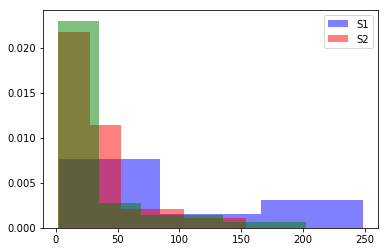

In [7]:
num_bins1 = 3
num_bins2 = 6
num_bins3 = 6
num_bins4 = 4
# the histogram of the data
#normed = True, n is the counts normalized to form a probability density - n/len(x) dbin i.e. integral of hist will be 1

n1, bins, patches    = plt.hist(s1, bins = num_bins1, normed = True, facecolor= 'blue', alpha=0.5, histtype="bar")
n2, bins2, patches2  = plt.hist(s2, bins = num_bins2, normed = True, facecolor= 'red', alpha=0.5, histtype = "bar")
n3, bins3,  patches3 = plt.hist(s3, bins = num_bins3, normed = True, facecolor = 'green',  alpha = 0.5, histtype = "bar")
#n4, bins4,  patches4 = plt.hist(s4, bins = num_bins4, normed = True, facecolor = 'orange', alpha = 0.5, histtype = "bar")

plt.legend(["S1", "S2"])

In [8]:
index = [0]

b1 = np.delete(bins, index)
b2 = np.delete(bins2, index)
b3 = np.delete(bins3, index)
#b4 = np.delete(bins4, index)

In [9]:
lnP1 = np.log(n1)


In [10]:
lnP2 = np.log(n2)

In [11]:
lnP3 = np.log(n3)

In [12]:
#lnP4 = np.log(n4)

NameError: name 'b4' is not defined

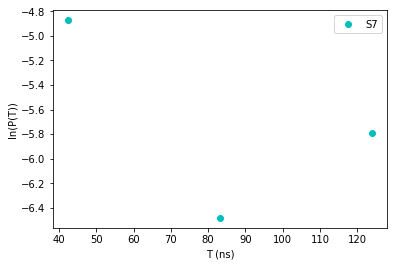

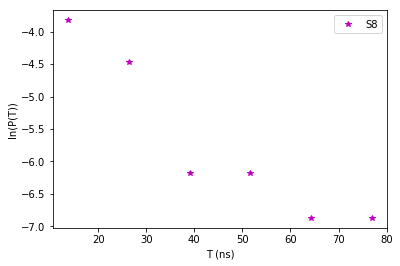

In [13]:
fig, ax = plt.subplots()

fig1 = plt.figure(1)

# the histogram of the data
#normed = True, n is the counts normalized to form a probability density - n/len(x) dbin i.e. integral of hist willbe 1
plt.plot((0.5*b1), lnP1, "c", linewidth = 0, marker = "o" )

plt.xlabel('T (ns)')
plt.ylabel('ln(P(T))')
#plt.xlim(0, 380)
#plt.ylim(0, 0.085)
plt.legend(["S7"])




fig2 = plt.figure(2)

plt.plot((0.5*b2), lnP2, "m", linewidth = 0, marker = "*" )

plt.xlabel('T (ns)')
plt.ylabel('ln(P(T))')
#plt.xlim(0, 380)
#plt.ylim(0, 0.085)
plt.legend(["S8"])



#fig3 = plt.figure(3)

#plt.plot((0.5*b3), lnP3, "y", linewidth = 0, marker = ">" )

#plt.xlabel('T (ns)')
#plt.ylabel('ln(P(T))')
#plt.xlim(0, 380)
#plt.ylim(0, 0.085)
#plt.legend(["S11"])

#ax.set_yscale("log")



fig4 = plt.figure(4)
plt.plot((0.5*b4), n4, "k", linewidth = 2.0, marker = "s" )


plt.xlabel('T (ns)')
plt.ylabel('P(T)')
#plt.xlim(0, 380)
#plt.ylim(0, 0.065)
plt.legend(["S4"])

plt.show()
#save all figures to 1 pdf
#pp = PdfPages("dCsA_450_LnP.pdf")
#pp.savefig(fig1, dpi = 300, transparent = True)
#pp.savefig(fig2, dpi = 300, transparent = True)
#pp.savefig(fig3, dpi = 300, transparent = True)
#pp.savefig(fig4, dpi = 300, transparent = True)
#pp.close()


In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

In [17]:
#calculate best fit line

xi = 0.5*b1
y = lnP1

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

xi2 = 0.5*b2
y2 = lnP2

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(xi2,y2)
line2 = slope2*xi2+intercept2

xi3 = 0.5*b3
y3 = lnP3

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(xi3,y3)
line3 = slope3*xi3+intercept3

#xi4 = 0.5*b4
#y4 = lnP4

#slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(xi4,y4)
#line4 = slope4*xi4+intercept4

slope_list = [slope, slope2,slope3]
#slope_list = [slope, slope2,slope3, slope4]

intercept_list = [intercept, intercept2, intercept3]
#intercept_list = [intercept, intercept2, intercept3, intercept4]
error_list = [std_err, std_err2, std_err3]
#error_list = [std_err, std_err2, std_err3, std_err4]

In [18]:
np.savetxt("510_dcsa_std_err.txt", error_list)

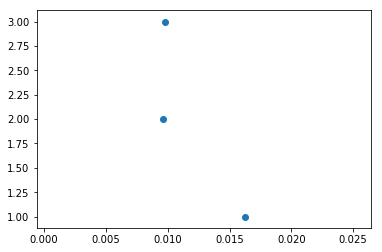

In [21]:
err_num = [1,2,3]
plt.scatter(error_list, err_num)

In [ ]:
#np.savetxt("450_dcsa_slope.txt", slope_list)
#np.savetxt("450_dcsa_intercept.txt", intercept_list)


In [ ]:
fig, ax = plt.subplots()

fig1 = plt.figure(1)

# the histogram of the data
#normed = True, n is the counts normalized to form a probability density - n/len(x) dbin i.e. integral of hist willbe 1
plt.plot((0.5*b1), lnP1, "c", linewidth = 0, marker = "o" )
plt.plot(xi, line, "k")

plt.xlabel('T (ns)')
plt.ylabel('ln(P(T))')
plt.legend(["s7 data", "best fit line"])

fig2 = plt.figure(2)

plt.plot((0.5*b2), lnP2, "m", linewidth = 0, marker = "*" )
plt.plot(xi2, line2, "k")

plt.xlabel('T (ns)')
plt.ylabel('ln(P(T))')
plt.legend(["s8 data", "best fit line"])

#fig3 = plt.figure(3)

#plt.plot((0.5*b3), lnP3, "y", linewidth = 0, marker = ">" )
#plt.plot(xi3, line3, "k")

#plt.xlabel('T (ns)')
#plt.ylabel('ln(P(T))')
#plt.legend(["s11 data", "best fit line"])

#fig4 = plt.figure(4)
#plt.plot((0.5*b4), lnP4, "m", linewidth = 0, marker = "s" )
#plt.plot(xi4, line4, "k")
#plt.xlabel('T (ns)')
#plt.ylabel('P(T)')
#plt.legend(["s4 data", "best fit line"])

plt.show()

#save all figures to 1 pdf
#pp = PdfPages("dCsA_450_LnP_fitline.pdf")
#pp.savefig(fig1, dpi = 300, transparent = True)
#pp.savefig(fig2, dpi = 300, transparent = True)
#pp.savefig(fig3, dpi = 300, transparent = True)
#pp.savefig(fig4, dpi = 300, transparent = True)
#pp.close()
